In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Case**:Considerando uma nova série de dados do Retorno de ativos financeiros, um investidor deseja saber se aconselhável investir em um determinado tipo de ação na próxima semana. Realize uma análise desta série de retornos e avalie a possibilidade do ajuste de um modelo AR. Os dados disponíveis são diários (dias úteis). Identifique sua ordem e realize a previsão para a próxima semana.


Utilize todas as ferramentas aprendidas até o momento para tirar suas conclusões de negócio.

In [2]:
# Leitura da base de dados
retorno_ativos2 = pd.read_table("RetornoAtivos2.txt", header=None)
retorno_ativos2

,0
0,0.374018
1,0.155309
2,-0.755442
3,0.076216
4,-1.702968
...,...
1995,-1.465024
1996,-1.035316
1997,1.924601
1998,1.849933


In [14]:
retorno_ativos2 = retorno_ativos2

In [12]:
# Análise exploratória da série
retorno_ativos2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,2000.0,0.074432,1.076006,-3.80764,-0.692884,0.088257,0.809378,3.655841


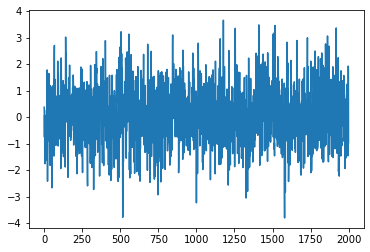

In [5]:
# Gráfico temporal
plt.plot(retorno_ativos2)

In [15]:
# Teste de Estacionariedade
from statsmodels.tsa.stattools import adfuller

result = adfuller(retorno_ativos2, autolag='t-stat')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#Busca P-Valores baixos para comprovar serie estacionaria

ADF Statistic: -9.961928
p-value: 0.000000


In [7]:
# Gráfico de Autocorrelação e Autocorrelação Parcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

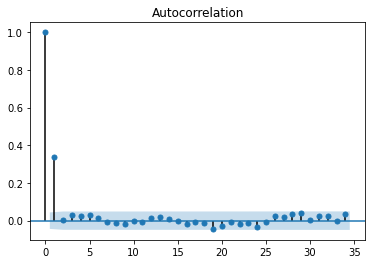

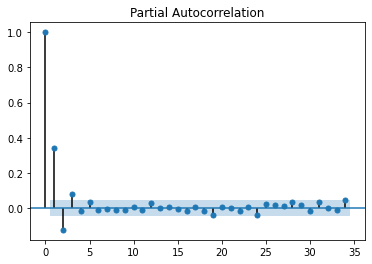

In [8]:
plot_acf(retorno_ativos2);
plot_pacf(retorno_ativos2);

In [9]:
# Ajuste do modelo
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

# Modelo AR(3)
model = ARIMA(retorno_ativos2, order=(3,0,0))
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 2000
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2839.955
Date:                Wed, 20 Jan 2021   AIC                           5689.910
Time:                        22:22:38   BIC                           5717.915
Sample:                             0   HQIC                          5700.193
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0743      0.033      2.271      0.023       0.010       0.138
ar.L1          0.3912      0.022     17.442      0.000       0.347       0.435
ar.L2         -0.1553      0.024     -6.551      0.0

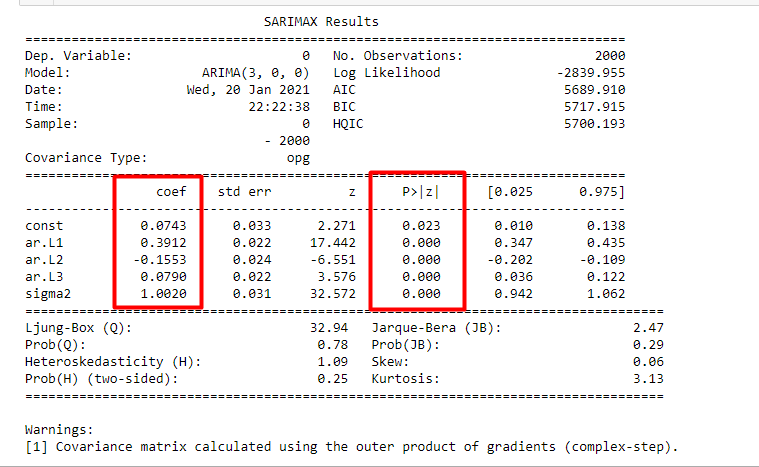

const = Intercepto

Quando os residuos todos ficam dentro do esperado, sig que o modelo está bem ajustado

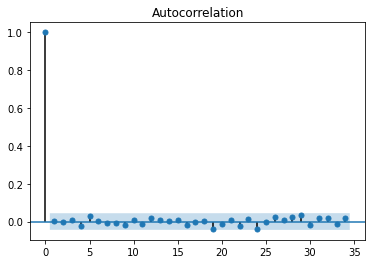

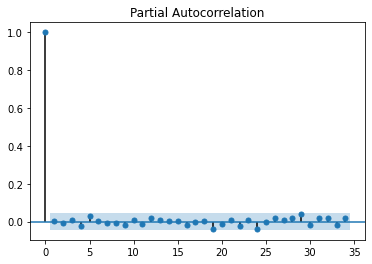

In [16]:
# Gráfico de Autocorrelação e Autocorrelação Parcial dos resíduos
residuals = DataFrame(model_fit.resid)
plot_acf(residuals);
plot_pacf(residuals);

In [17]:
# Projeção 5 passos para frente
forecast = model_fit.forecast(5)
forecast

2000   -0.464437
2001    0.166186
2002    0.111318
2003    0.031977
2004    0.059257
dtype: float64